In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/batang.ttc'  # 사용 가능한 한글 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [23]:
# 데이터 불러오기
df1 = pd.read_excel('Regression.xlsx', sheet_name='Variables')
df2 = pd.read_excel('Regression.xlsx', sheet_name='Data')

In [24]:
# 첫 번째 행 제거
df1 = df1.drop(0)


In [25]:
# 결과 출력
df2

,dupersid,age,famsze,educyr,totexp,private,retire,female,white,hisp,...,injury,priolist,totchr,omc,hmo,mnc,ratio,suppins,hvgg,hfp
0,93193020,69,2,14,3,Yes,Yes,No,Yes,No,...,No,No,0,Yes,No,No,0.0,Yes,Yes,No
1,72072017,65,1,11,6,Yes,No,Yes,Yes,No,...,No,No,0,Yes,No,No,0.0,Yes,Yes,No
2,25296013,85,1,14,9,No,No,Yes,Yes,No,...,Yes,No,0,No,No,No,0.0,No,Yes,No
3,23628011,76,5,10,14,No,No,Yes,Yes,No,...,Yes,Yes,0,No,No,No,0.0,No,Yes,No
4,95041014,71,1,14,18,No,Yes,Yes,Yes,No,...,No,No,1,No,No,No,0.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,92818025,71,2,12,0,Yes,No,Yes,Yes,No,...,Yes,No,1,Yes,No,No,0.0,Yes,No,No
3060,23505022,73,1,12,0,No,No,No,Yes,No,...,No,No,0,No,No,No,1.0,No,No,No
3061,27253022,73,3,8,0,No,No,Yes,Yes,No,...,No,No,0,No,No,No,0.0,No,No,Yes
3062,93513011,84,3,12,0,No,No,Yes,Yes,No,...,No,Yes,1,No,No,No,0.0,No,Yes,No


- ↑ 총 3064명(행)의 관측치, 28개 변수

# 문제 1. 주어진 데이터를 이용하여 데이터 분석 후 코드와 분석 내용을 제출하세요. (단, 파이썬과 R 무엇을 사용하여도 무관하나, 제출된 코드는 작동이 되어야 합니다.)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dupersid  3064 non-null   int64  
 1   age       3064 non-null   int64  
 2   famsze    3064 non-null   int64  
 3   educyr    3064 non-null   int64  
 4   totexp    3064 non-null   int64  
 5   private   3064 non-null   object 
 6   retire    3064 non-null   object 
 7   female    3064 non-null   object 
 8   white     3064 non-null   object 
 9   hisp      3064 non-null   object 
 10  marry     3064 non-null   object 
 11  northe    3064 non-null   object 
 12  mwest     3064 non-null   object 
 13  south     3064 non-null   object 
 14  phylim    3064 non-null   object 
 15  actlim    3064 non-null   object 
 16  msa       3064 non-null   object 
 17  income    3064 non-null   float64
 18  injury    3064 non-null   object 
 19  priolist  3064 non-null   object 
 20  totchr    3064 non-null   int6

In [27]:
df2.isna().sum()

dupersid    0
age         0
famsze      0
educyr      0
totexp      0
private     0
retire      0
female      0
white       0
hisp        0
marry       0
northe      0
mwest       0
south       0
phylim      0
actlim      0
msa         0
income      0
injury      0
priolist    0
totchr      0
omc         0
hmo         0
mnc         0
ratio       0
suppins     0
hvgg        0
hfp         0
dtype: int64

> 1.Regression.xlsx파일로부터 전체데이터의 기초통계량

In [28]:
df2.describe()

,dupersid,age,famsze,educyr,totexp,income,totchr,ratio
count,3.064000e+03,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000
mean,6.241623e+07,74.171671,1.907963,11.775457,7030.889360,22.474722,1.754243,0.012095
std,3.433003e+07,6.372938,0.988350,3.435878,11852.751889,22.534910,1.307197,0.095816
min,2.000402e+07,65.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.440302e+07,69.000000,1.000000,10.000000,1272.500000,9.594000,1.000000,0.000000
50%,9.008002e+07,73.000000,2.000000,12.000000,3134.500000,15.506000,2.000000,0.000000
75%,9.418003e+07,79.000000,2.000000,14.000000,7142.000000,27.922750,3.000000,0.000000
max,9.834702e+07,90.000000,13.000000,17.000000,125610.000000,312.460000,7.000000,1.000000


> 따라서 위에서 계산이 가능한 숫자 type의 int와 float 데이터에 대해서는 위와 같은 describe를 얻을 수 있었음. 이 값들이 무엇을 의미하는 지는 아래에서 설명

- 평균 dupersid: 6.241623e+07
- 평균 age: 74.17
- 평균 famsze: 1.91
- 평균 educyr: 11.78
- 평균 totexp: 7030.89
- 평균 income: 22.47
- 평균 totchr: 1.75

In [29]:
# df1에서 두 번째와 세 번째 열 추출
column_2 = df1.iloc[:, 1]
column_3 = df1.iloc[:, 2]

# 새로운 행을 추가할 데이터 준비
new_row_data = {}

# df2의 각 열에 대해 df1의 column_3 데이터 할당 (column_2와 일치하는 열 이름 기준으로)
for col in df2.columns:
    if col in column_2.values:
        # column_2에서의 위치를 찾아 해당 위치의 column_3 값을 new_row_data에 추가
        index = column_2[column_2 == col].index[0]
        new_row_data[col] = column_3[index]
    else:
        # 일치하는 열이 없으면 NaN 또는 다른 적절한 기본값 할당
        new_row_data[col] = np.nan

# 각 열의 head 아래에 설명을 붙여서 head가 무엇을 의미하는지 확인해보기.
pd.concat([pd.DataFrame([new_row_data]), df2]).reset_index(drop=True)

,dupersid,age,famsze,educyr,totexp,private,retire,female,white,hisp,...,injury,priolist,totchr,omc,hmo,mnc,ratio,suppins,hvgg,hfp
0,Subject ID,age,Size of family,Years of education,Total medical expenditure,Private supplement insurance,retired,female,white,hispanic,...,condition is caused by an accidnet/injury,has medical conditions that are on the priorit...,number of chronic problems,NaN,NaN,NaN,NaN,NaN,"Health status is excellent, good or very good",Health status is fair or poor
1,93193020,69,2,14,3,Yes,Yes,No,Yes,No,...,No,No,0,Yes,No,No,0.0,Yes,Yes,No
2,72072017,65,1,11,6,Yes,No,Yes,Yes,No,...,No,No,0,Yes,No,No,0.0,Yes,Yes,No
3,25296013,85,1,14,9,No,No,Yes,Yes,No,...,Yes,No,0,No,No,No,0.0,No,Yes,No
4,23628011,76,5,10,14,No,No,Yes,Yes,No,...,Yes,Yes,0,No,No,No,0.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,92818025,71,2,12,0,Yes,No,Yes,Yes,No,...,Yes,No,1,Yes,No,No,0.0,Yes,No,No
3061,23505022,73,1,12,0,No,No,No,Yes,No,...,No,No,0,No,No,No,1.0,No,No,No
3062,27253022,73,3,8,0,No,No,Yes,Yes,No,...,No,No,0,No,No,No,0.0,No,No,Yes
3063,93513011,84,3,12,0,No,No,Yes,Yes,No,...,No,Yes,1,No,No,No,0.0,No,Yes,No


- dupersid(Subject ID): 데이터셋에서 각 개인을 식별하는 고유 번호
- age(age): 개인의 나이
- famsze(Size of family): 가족의 크기. 즉, 가족 구성원의 수를 의미
- educyr(Years of education): 교육 연수. 개인이 받은 정규 교육의 연수
- totexp(Total medical expenditure): 총 의료비 지출. 개인이나 가족이 의료 서비스에 지출한 총액
- income(annual household income/100): 연간 가구 소득을 100으로 나눈 값. 소득 수준을 나타내는 지표
- totchr(number of chronic problems): 만성 문제의 수. 개인이 가지고 있는 만성 질환의 수
- ratio: 특정 계산에 사용되는 비율. 그러나 무엇을 의미하는지에 대한 정보가 없음

> 따라서 위의 describe에서 구한 값은 아래의 값임을 알 수 있다.
- 평균 나이: 74.17
- 평균 가족 크기: 1.91
- 평균 교육 연수: 11.78
- 평균 의료비 지출: 7030.89
- 평균 소득: 22.47
- 평균 만성 질환자 수: 1.75

In [30]:
# 이제 데이타 타입이 object인 경우에 대해서 분석해보자.
df2.describe(include=['object'])
# 여기서 freq는 top이 나온 횟수를 뜻한다.

,private,retire,female,white,hisp,marry,northe,mwest,south,phylim,actlim,msa,injury,priolist,omc,hmo,mnc,suppins,hvgg,hfp
count,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064,3064
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
top,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,Yes,Yes,No
freq,1781,1822,1776,2985,2804,1703,2599,2356,1850,1760,2195,2272,2462,2460,1697,2709,3005,1781,1855,2447


In [31]:
# 각 열에 대한 상세한 통계 정보를 저장할 데이터프레임을 생성하다.
stats_df = pd.DataFrame()

# df2의 각 열에 대해 처리하다.
for column in df2.columns:
    # 각 값의 개수를 계산하다.
    counts = df2[column].value_counts(dropna=False)
    
    # 'Yes'와 'No'의 개수를 추출하다. (해당 값이 없는 경우 0으로 처리)
    yes_count = counts.get('Yes', 0)
    no_count = counts.get('No', 0)
    
    # 기타 값의 개수를 계산하다. (전체 개수에서 'Yes'와 'No'의 개수를 뺀 값)
    other_count = counts.sum() - yes_count - no_count
    
    # 'Yes'의 비율을 계산하다. (0으로 나누는 경우를 방지)
    yes_percentage = (yes_count / counts.sum()) * 100 if counts.sum() > 0 else 0
    
    # 상세한 통계 정보를 데이터프레임에 추가하다.
    stats_df[column] = [yes_count, no_count, other_count, yes_percentage]

# 행 이름을 변경하다.
stats_df.index = ['Yes Count', 'No Count', 'Other Count', 'Yes Percentage']
stats_df

,dupersid,age,famsze,educyr,totexp,private,retire,female,white,hisp,...,injury,priolist,totchr,omc,hmo,mnc,ratio,suppins,hvgg,hfp
Yes Count,0.0,0.0,0.0,0.0,0.0,1781.000000,1822.000000,1776.000000,2985.000000,260.00000,...,602.00000,2460.000000,0.0,1367.000000,355.000000,59.000000,0.0,1781.000000,1855.000000,598.000000
No Count,0.0,0.0,0.0,0.0,0.0,1283.000000,1242.000000,1288.000000,79.000000,2804.00000,...,2462.00000,604.000000,0.0,1697.000000,2709.000000,3005.000000,0.0,1283.000000,1209.000000,2447.000000
Other Count,3064.0,3064.0,3064.0,3064.0,3064.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,3064.0,0.000000,0.000000,0.000000,3064.0,0.000000,0.000000,19.000000
Yes Percentage,0.0,0.0,0.0,0.0,0.0,58.126632,59.464752,57.963446,97.421671,8.48564,...,19.64752,80.287206,0.0,44.614883,11.586162,1.925587,0.0,58.126632,60.541775,19.516971


> 따라서 위를 통해 전체 데이터 중에서 숫자가 아닌 yes or no 데이터들에 관해서 yes와 no의 횟수와 yes의 퍼센테이지에 대해 알 수 있다.

# 1_1) 그룹 1 – 성별

In [32]:
stats_df['female']

Yes Count         1776.000000
No Count          1288.000000
Other Count          0.000000
Yes Percentage      57.963446
Name: female, dtype: float64

> 우선 총 3064명 중에서, df2.isna().sum()의 값은 모두 0이고, yes+no=3064이므로 모두 정상적인 응답을 했다. 
> female 응답자의 yes가 1776이므로, 응답자 중에서 여성은 1776명이며, 1288명은 남자가 된다. 즉, 전체 응답자 중에서 약 57.96%가 여성임을 판단할 수 있다.

# 1_2) 그룹 2 – 미혼 /기혼


In [33]:
stats_df['marry']

Yes Count         1703.00000
No Count          1361.00000
Other Count          0.00000
Yes Percentage      55.58094
Name: marry, dtype: float64

> marry의 yes는 1703이므로, 이미 결혼을 한 기혼은 1703명이며, 1361명은 미혼이다. 즉, 전체 응답자 중에서 약 55.58%가 결혼을 했음을 알 수 있다.

# 1_3) 그룹 3 – 근로자 /은퇴자

In [34]:
stats_df['retire']

Yes Count         1822.000000
No Count          1242.000000
Other Count          0.000000
Yes Percentage      59.464752
Name: retire, dtype: float64

> retire의 yes는 1822이므로, 이미 은퇴를 한 사람은 1822명이며, 1242명은 은퇴가 아니다. 즉, 전체 응답자 중에서 약 59.46%가 은퇴를 했음을 알 수 있다.
> 나머지 데이터에서도 동일한 방식으로 분석을 할 수 있다.

# 2. 의료비지출(totexp)과 소득(income)간의 상관관계를 보기 위한 산점도를 그리고 상관계수를 구하세요.

> 산점도

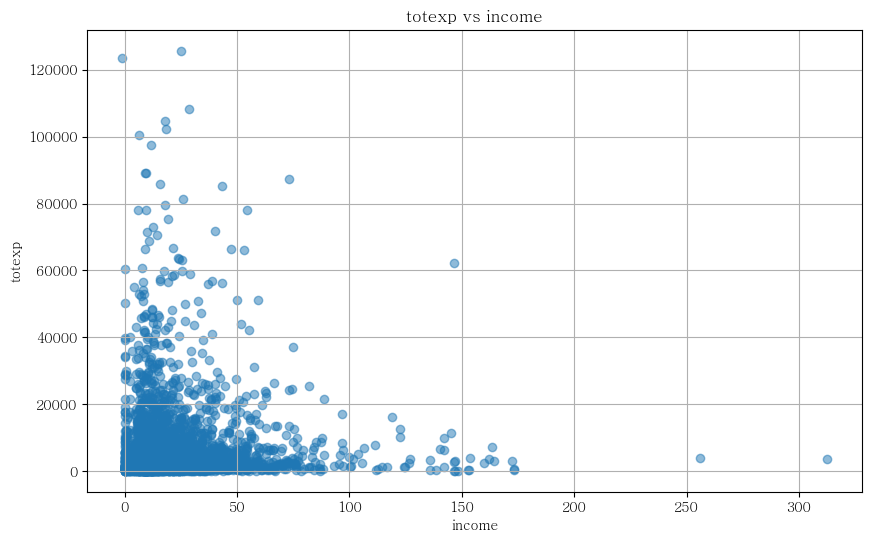

In [35]:
# Matplotlib를 사용하여 'income'과 'totexp'의 관계를 나타내는 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df2['income'], df2['totexp'], alpha=0.5)
plt.title('totexp vs income')
plt.xlabel('income')
plt.ylabel('totexp')
plt.grid(True)
plt.show()

> 상관계수

In [36]:
# numpy 이용
correlation = np.corrcoef(df2['income'], df2['totexp'])
correlation[0,1]

-0.011080313848094419

- 의료비지출(totexp)과 소득(income) 간의 상관계수는 -0.011이 나왔다.
- 이 값은 매우 약한 음의 상관관계를 나타내며, 사실상 두 변수 간에 상관관계가 없다고 볼 수 있다.

- 상관계수의 절대값은 다음과 같은 상관관계를 보여준다. 
- 0.0 ~ 0.2: 매우 약한 상관관계
- 0.2 ~ 0.4: 약한 상관관계
- 0.4 ~ 0.6: 중간 정도의 상관관계
- 0.6 ~ 0.8: 강한 상관관계
- 0.8 ~ 1.0: 매우 강한 상관관계

> 따라서 상관계수가 -0.011은 절대값이 0에 아주 가깝기 때문에, 의료비지출과 소득 간의 선형 관계가 거의 없다고 해석할 수 있다.

# 3.주어진 데이터로 회귀분석 및 분산분석 결과를 제시하고, 이에 대한 해석을 하세요

# 3_1) 종속변수는 의료비지출(totexp)이고 독립변수는 phylim actlim totchr age female income 입니다.

In [37]:
# 역시 수업시간에 배웠던, statsmodels.api를 통해서 회귀분석해 보겠다.
# import statsmodels.api as sm    # 상단에서 import

# 회귀분석 모델 수행
x_cols = ['phylim', 'actlim', 'totchr', 'age', 'female', 'income']
x = df2[x_cols]

# 범주형 변수를 더미 변수로 변환
x = pd.get_dummies(x, drop_first=True)

# 상수 term 추가
x = sm.add_constant(x)

y = df2['totexp']


# 모델 수행
model_3_1 = sm.OLS(y,x)
result = model_3_1.fit()

# 결과 요약
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 totexp   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     70.95
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.09e-83
Time:                        03:36:32   Log-Likelihood:                -32889.
No. Observations:                3064   AIC:                         6.579e+04
Df Residuals:                    3057   BIC:                         6.583e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8178.7980   2469.569      3.312      0.001    3336.615     1.3e+04
totchr      1958.7548    166.040     11.797      0.000    1633.193    2284.317
age          -82.9771     33.104     -2.507      0.012    -147.885     -18.070
income        10.5460      9.136      1.154      0.248      -7.368      28.460
phylim_Yes  2470.0897    521.185      4.739      0.000    1448.181    3491.999
actlim_Yes  3638.6492    565.643      6.433      0.000    2529.571    4747.727
female_Yes -1293.4480    412.401     -3.136      0.002   -2102.058    -484.838
==============================================================================
Omnibus:                     2674.546   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84227.378
Skew:                           4.122   Prob(JB):                         0.00
Kurtosis:                      27.327   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared (결정계수): 0.122
결정계수는 모델이 데이터의 변동성을 얼마나 잘 설명하는지 나타내는 지표입니다. 값의 범위는 0에서 1 사이입니다. 0은 모델이 데이터의 변동성을 전혀 설명하지 못함을, 1은 완벽하게 설명함을 의미하다.
이 경우, R-squared 값이 0.122인 것은 모델이 데이터 변동성의 약 12.2%만 설명한다는 것을 의미하며, 이는 상대적으로 낮은 설명력을 나타낸다.

- Adj. R-squared (조정된 결정계수): 0.121
조정된 결정계수는 독립변수의 수가 많을 때 과대평가될 수 있는 일반 결정계수를 조정한 것입니다.
이 값도 R-squared와 유사하게 낮게 나타나, 모델이 종속변수의 변동성을 제한적으로만 설명한다는 것을 나타낸다.

- F-statistic (F-통계량): 70.95
F-통계량은 모델의 전체적인 유의성을 검증하다. 높은 F-값은 모델이 유의미하다는 것을 나타낸다.
이 경우, F-값이 70.95로 높게 나타나 모델이 통계적으로 유의미하다는 것을 나타낸다.

- Prob (F-statistic) (F-통계량의 p-값): 5.09e-83
모델의 F-통계량에 대한 p-값으로, 모델이 통계적으로 유의미한지를 나타낸다.
일반적으로 0.05 이하의 값이면 모델이 통계적으로 유의미하다고 판단하다. 이 경우, 매우 낮은 p-값(5.09e-83)은 모델이 통계적으로 유의미하다는 것을 강력하게 나타낸다.

- coef (회귀 계수)
각 독립변수의 계수는 해당 변수가 종속변수에 미치는 영향의 크기와 방향을 나타낸다.
예를 들어, phylim_Yes의 계수는 2470.09로, 이는 phylim이 'Yes'일 때 totexp가 평균적으로 2470.09만큼 증가함을 나타낸다.

- P>|t| (t-통계량의 p-값)
각 독립변수의 p-값은 해당 변수가 통계적으로 유의미한지를 나타낸다. 일반적으로 0.05 이하의 값이면 유의미하다고 판단하다.
예를 들어, income의 p-값은 0.248로, 이는 income이 totexp에 미치는 영향이 통계적으로 유의미하지 않을 가능성이 있다는 것을 나타낸다.

- Omnibus, Prob(Omnibus), Skew, Kurtosis, Durbin-Watson, Jarque-Bera (JB), Prob(JB)
이러한 값들은 모델의 오차항(residuals)에 대한 다양한 테스트를 나타낸다. 정규성, 등분산성, 독립성 등의 가정을 검증하는 데 사용됩니다.
이러한 통계적 검정은 모델의 적합성을 평가하는 데 중요하다.

In [38]:
# 역시 수업시간에 배웠던, statsmodels.api를 통해서 분산분석해 보겠다.
# from statsmodels.formula.api import ols

# 모델 수행
model_formula = 'totexp ~ C(phylim) + C(actlim) + C(female) + totchr + age + income' # C는 인자.
model_3_1_formula = ols(model_formula, data=df2).fit()

# 분산분석(ANOVA) 수행
anova_3_1 = sm.stats.anova_lm(model_3_1_formula, typ=2)
anova_3_1

,sum_sq,df,F,PR(>F)
C(phylim),2.775322e+09,1.0,22.461633,2.241743e-06
C(actlim),5.112911e+09,1.0,41.380537,1.449138e-10
C(female),1.215435e+09,1.0,9.836929,1.726685e-03
totchr,1.719509e+10,1.0,139.165750,1.927276e-31
age,7.763160e+08,1.0,6.282991,1.224174e-02
income,1.646299e+08,1.0,1.332406,2.484679e-01
Residual,3.777179e+11,3057.0,NaN,NaN


- C(phylim): F-통계량 22.46, p-값 2.24e-06
phylim 변수는 높은 F-통계량과 매우 낮은 p-값을 가지고 있어, totexp에 유의한 영향을 미치는 것으로 분석된다.

- C(actlim): F-통계량 41.38, p-값 1.45e-10
actlim 변수도 마찬가지로 높은 F-통계량과 매우 낮은 p-값을 가지고 있어, totexp에 유의한 영향을 미친다.

- C(female): F-통계량 9.84, p-값 0.0017
female 변수는 상대적으로 낮은 F-통계량을 가지지만, p-값이 0.05 미만이므로 totexp에 통계적으로 유의한 영향을 미친다.

- totchr: F-통계량 139.17, p-값 1.93e-31
totchr 변수는 매우 높은 F-통계량과 극도로 낮은 p-값을 가지며, totexp에 가장 큰 영향을 미치는 것으로 분석된다.

- age: F-통계량 6.28, p-값 0.0122
age 변수는 보다 낮은 F-통계량을 가지지만, p-값이 0.05 미만이므로 totexp에 통계적으로 유의한 영향을 미친다.

- income: F-통계량 1.33, p-값 0.2485
income 변수의 p-값이 0.05 이상으로, totexp에 통계적으로 유의미한 영향을 미치지 않는 것으로 분석된다.

# 3_2) exp(totexp)를 종속변수로 하여 두 모형을 모형을 비교하세요. (여기서 두 모형은 회귀 분석 모형과 분산분석 모형입니다.) 

In [39]:
# # exp(totexp)를 종속변수로 사용하기 위한 데이터 변환
# df2['exp_totexp'] = np.exp(df2['totexp'])

# # 독립변수 준비: 범주형 변수를 더미 변수로 변환하고 상수항 추가
# x_cols = ['phylim', 'actlim', 'totchr', 'age', 'female', 'income']
# x = pd.get_dummies(df2[x_cols], drop_first=True)
# x = sm.add_constant(x)

# # 회귀분석 모델 수행
# y = df2['exp_totexp']
# model_regression_exp = sm.OLS(y, x).fit()

# # 분산분석(ANOVA) 모델 수행
# model_formula_exp = 'exp_totexp ~ C(phylim) + C(actlim) + C(female) + totchr + age + income'
# model_3_2_formula_exp = ols(model_formula_exp, data=df2).fit()
# anova_3_2_exp = sm.stats.anova_lm(model_3_2_formula_exp, typ=2)

# 3-3) 위 데이터에서 의료비 지출을 예측하기 위한 적합한 모형을 제시하고, 의료비 지출을 예측하세요. (기존의 의료비 값과 예측된 의료비의 산점도를 그리세요.) 
# (참고 : 3_1, 3_2에 적용된 모형으로 예측해도 되고, 그 외의 필요한 또는 필요 없는 변수를 추가 또는 제거한 모형을 사용해도 됩니다. 단, 모형 선택에 대한 근거를 제시해주세요.)

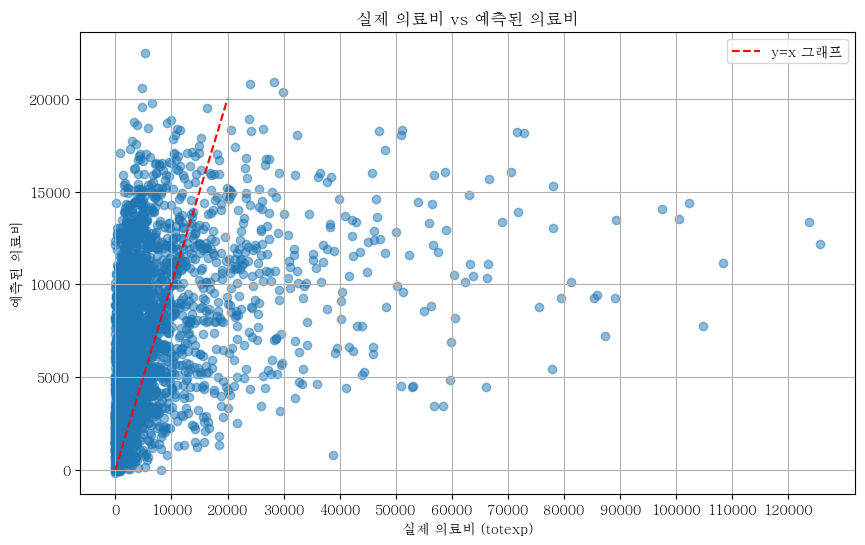

In [40]:
# 기존에 사용하던 도구를 그대로 활용해서 예측하도록 하겠다.

# 회귀분석 모델을 사용하여 예측 수행
model_regression_exp = sm.OLS(y, x).fit()
predicted_totexp = model_regression_exp.predict(x)


# 실제 의료비와 예측된 의료비의 산점도
plt.figure(figsize=(10, 6))
plt.scatter(df2['totexp'], predicted_totexp, alpha=0.5)
plt.title('실제 의료비 vs 예측된 의료비')
plt.xlabel('실제 의료비 (totexp)')
plt.ylabel('예측된 의료비')
plt.grid(True)

# y=x 그래프 그리기
plt.plot([0, 20000], [0, 20000], color='red', linestyle='--', label='y=x 그래프')

# x축 격자 설정
plt.xticks(range(0, int(max(df2['totexp']))+1, 10000))

plt.legend()

plt.show()

- 산점도를 모두 담기 위해서 x축은 120000까지 표현했고, y축은 20000까지만 표현했다.
- 따라서 해당 좌표평면 상에서는 y=x 그래프는 45°가 되지 않지만, 좌표에서 빨간 점선은 정확히 y=x를 나타낸다.
- 따라서, y=x 상에 있는 점들만이 예측값이 실제값과 완벽히 일치하는 완벽한 예측 모델이다.
- y=x 위의 영역, 즉, y > x '예측된 의료비' > '실제 의료비' 인 경우이고,
- y=x 아래의 영역, 즉, y < x '예측된 의료비' > '실제 의료비' 인 경우를 나타낸다.